<a href="https://colab.research.google.com/github/rehann888/MachineLearning1/blob/main/CAR_Price_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**INTRODUCTION**

In this project, I will predict car prices using descriptive and predictive analytical methods with several available independent variables. the modeling that I will use today will be of great benefit to the management team because with this, they can manipulate the car design, business strategy, etc., to meet a certain price level. Furthermore, the model will be a good way for management to understand the pricing dynamics of new markets.


1. **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor


2. **Reading Dataset**

In [2]:
df = pd.read_csv("data_car.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df = df.drop (['Market Category','Number of Doors'], axis=1)
df.head (5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
df.shape

(11914, 14)

3. **Check Duplicat and Missing Value**

In [ ]:
duplicated_raws = df[df.duplicated()]
duplicated_raws.shape

(721, 14)

In [ ]:
df = df.drop_duplicates()
df.count()

Make                 11193
Model                11193
Year                 11193
Engine Fuel Type     11190
Engine HP            11124
Engine Cylinders     11163
Transmission Type    11193
Driven_Wheels        11193
Vehicle Size         11193
Vehicle Style        11193
highway MPG          11193
city mpg             11193
Popularity           11193
MSRP                 11193
dtype: int64

In [ ]:
print("number after drop duplicated raws is: ", df.shape)

number after drop duplicated raws is:  (11193, 14)


In [ ]:
df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [ ]:
df = df.dropna()
df.count()

Make                 11092
Model                11092
Year                 11092
Engine Fuel Type     11092
Engine HP            11092
Engine Cylinders     11092
Transmission Type    11092
Driven_Wheels        11092
Vehicle Size         11092
Vehicle Style        11092
highway MPG          11092
city mpg             11092
Popularity           11092
MSRP                 11092
dtype: int64

4. **Rename Column**

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive_Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive_Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.head()

,make,model,year,engine_fuel_type,hp,cylinders,transmission,drive_mode,vehicle_size,vehicle_style,mpg-h,mpg-c,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


5. **Dataset Visualisation**

In [ ]:
df_categorical=df.select_dtypes(['object'])
df_categorical.head(3)

,make,model,engine_fuel_type,transmission,drive_mode,vehicle_size,vehicle_style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe


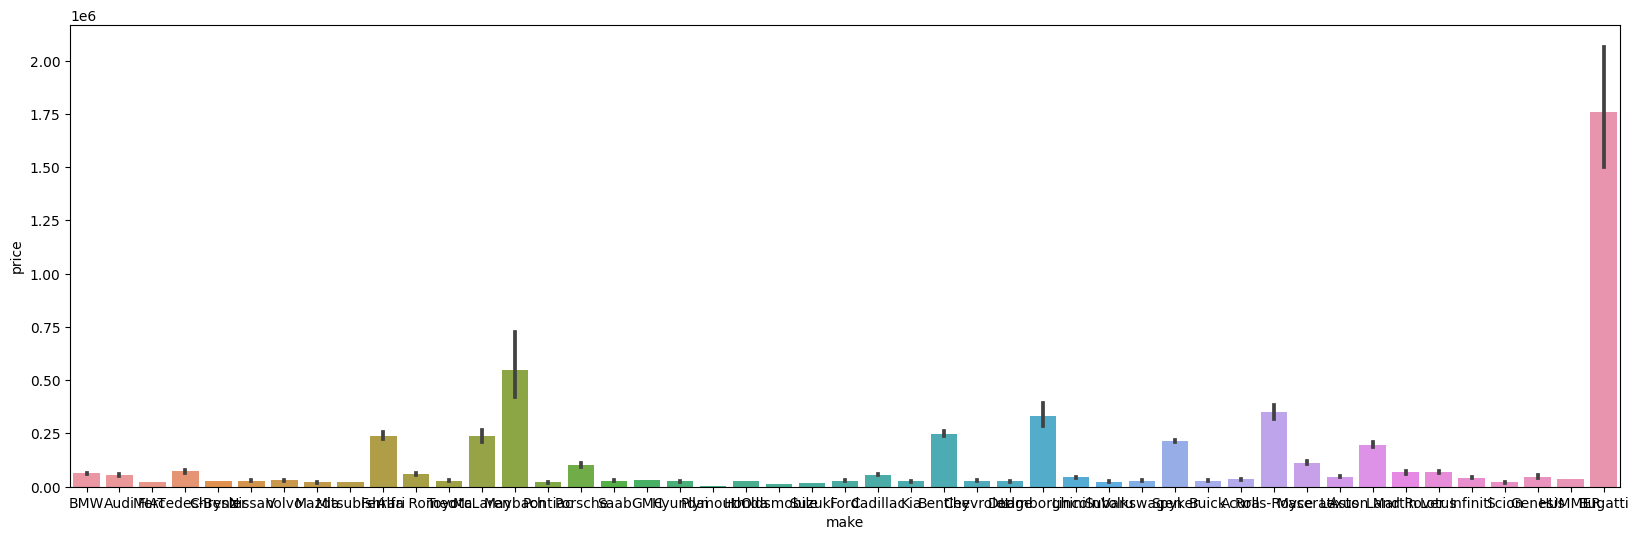

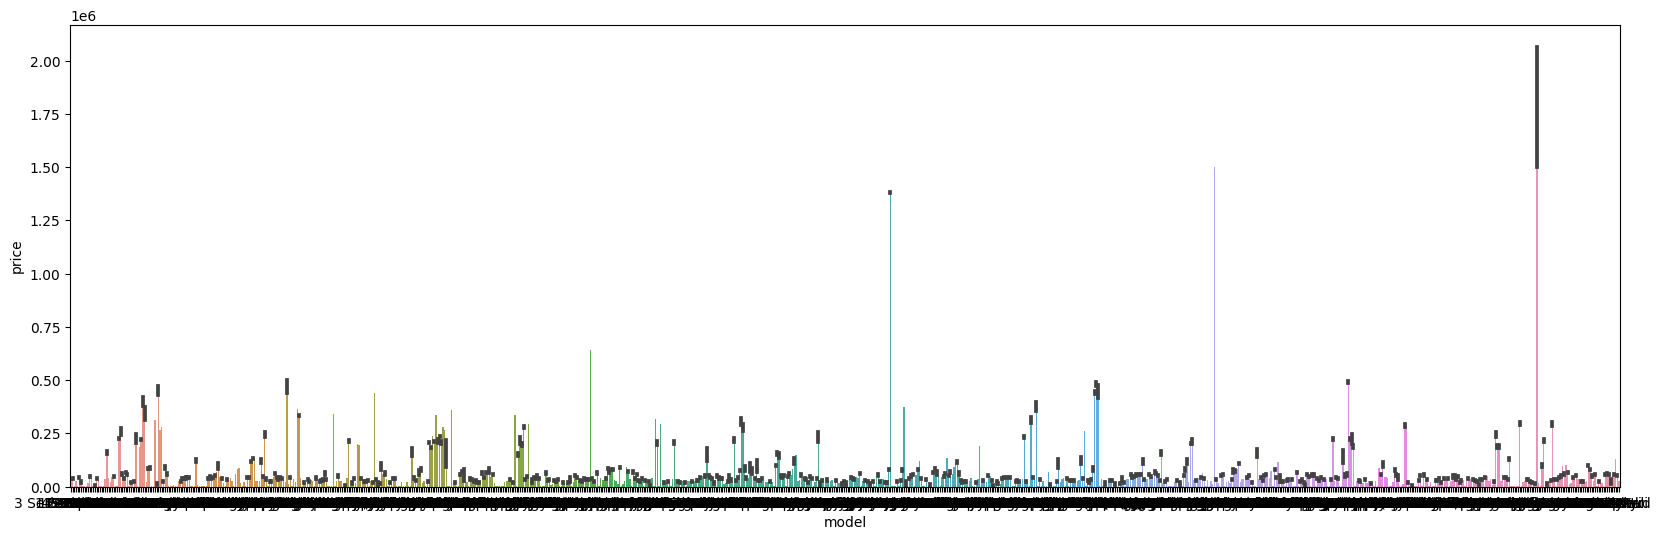

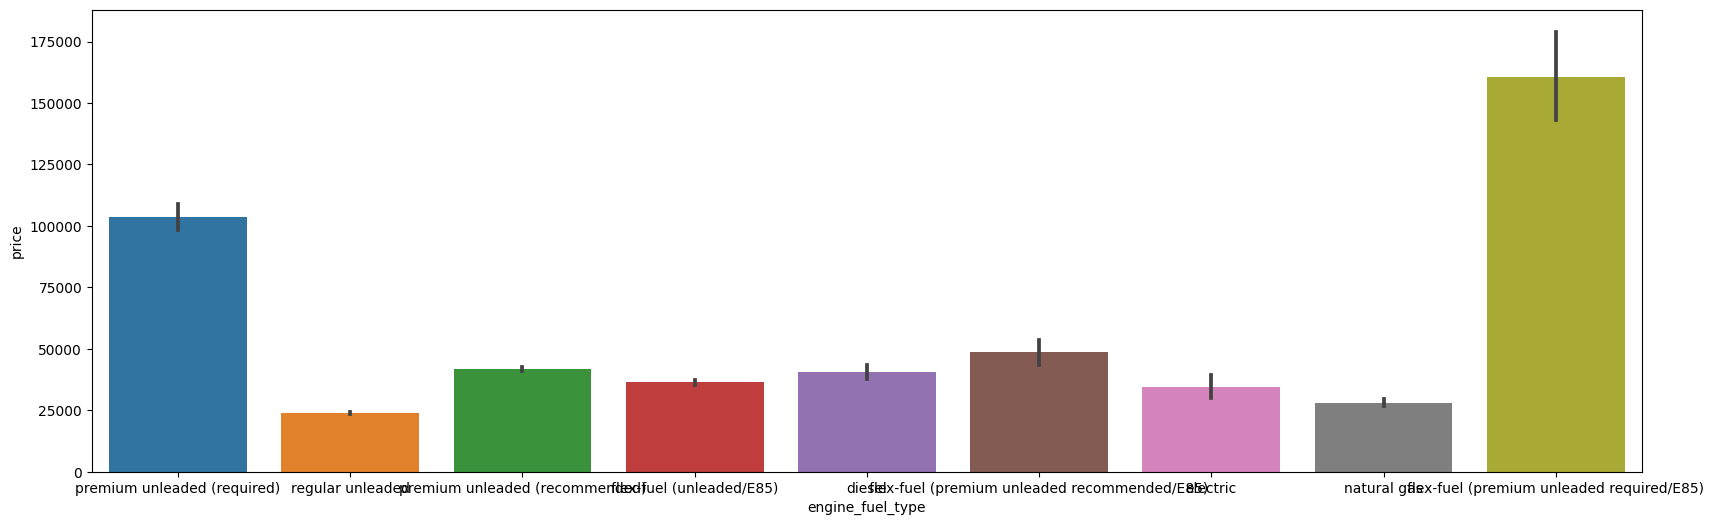

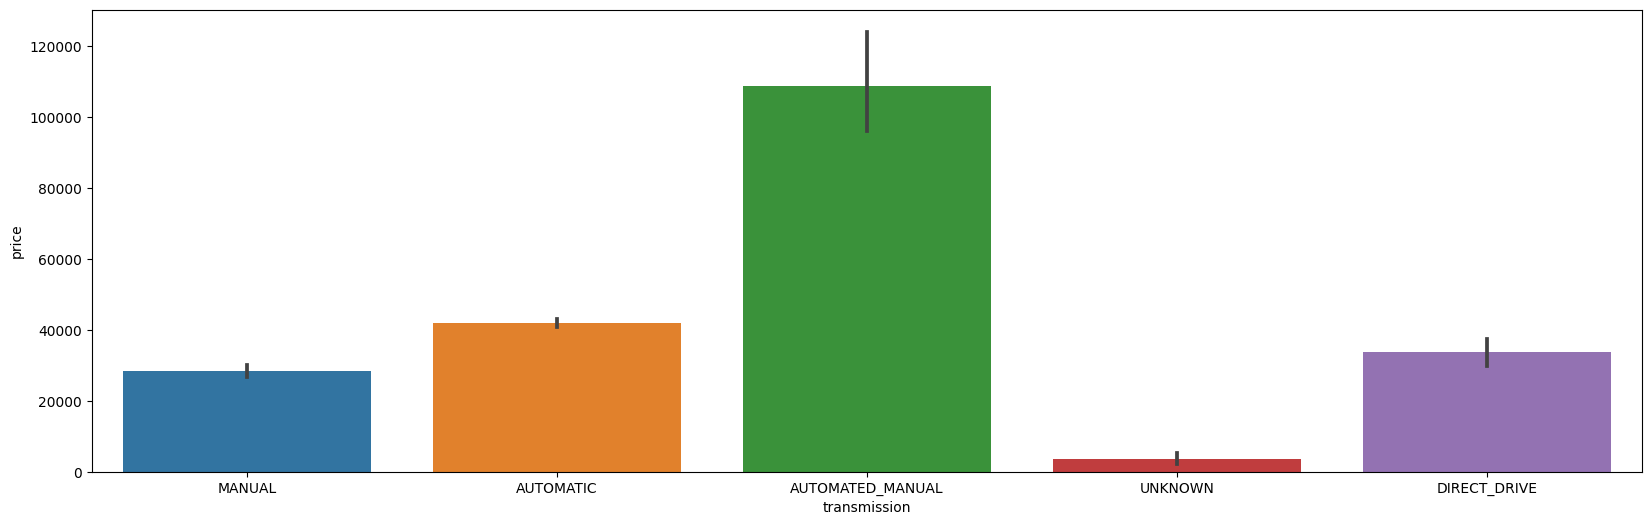

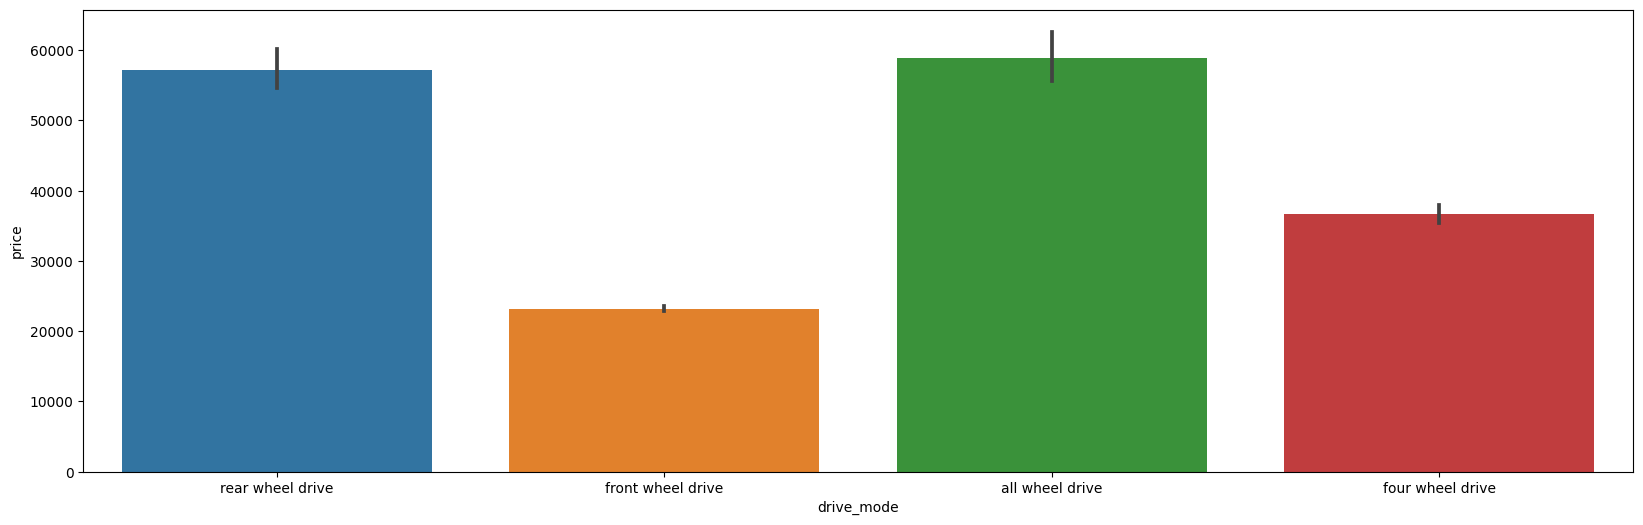

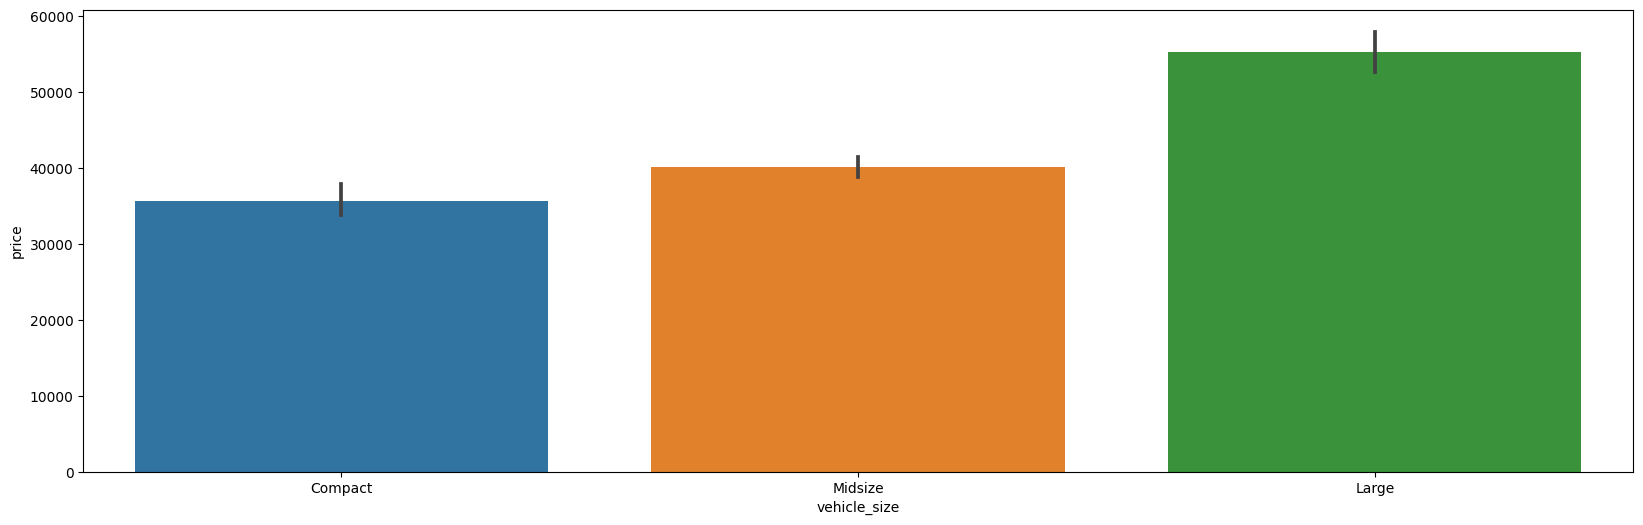

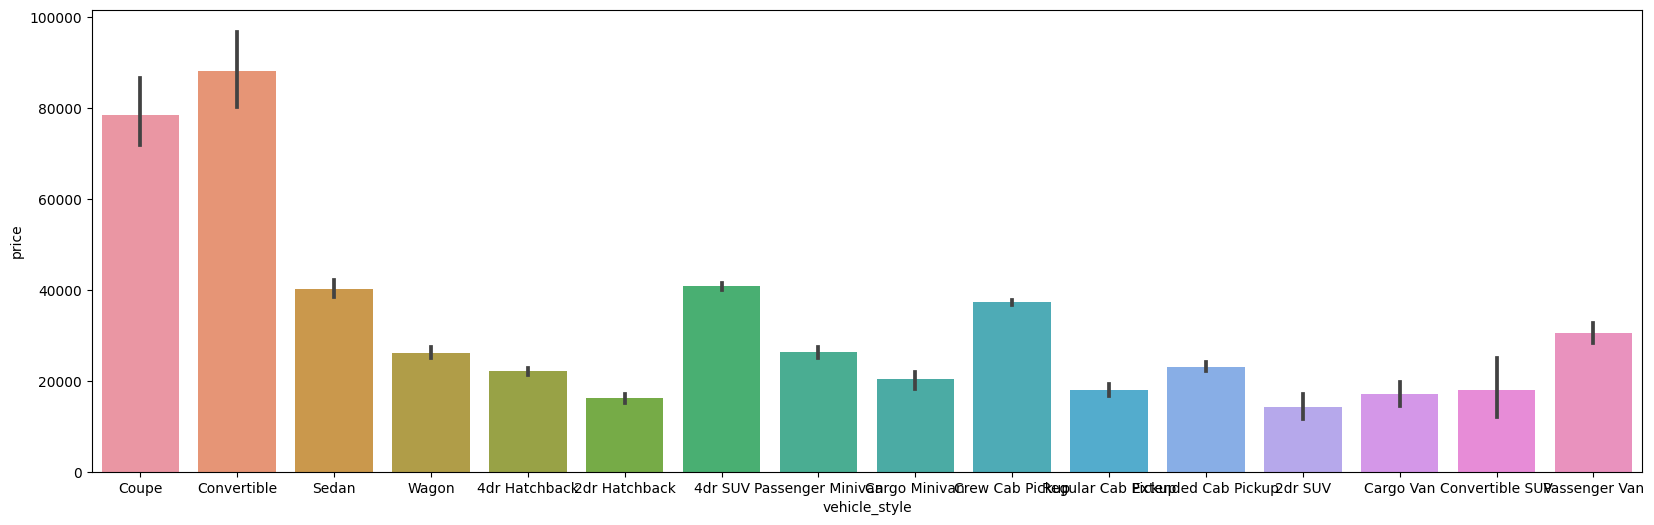

In [ ]:
for col in df_categorical:
    plt.figure(figsize=(20,6))
    sns.barplot(x=df[col],y=df['price'])

In [ ]:
df_numerical=df.select_dtypes(['int','float'])
df_numerical.head(3)

,year,hp,cylinders,mpg-h,mpg-c,popularity,price
0,2011,335.0,6.0,26,19,3916,46135
1,2011,300.0,6.0,28,19,3916,40650
2,2011,300.0,6.0,28,20,3916,36350


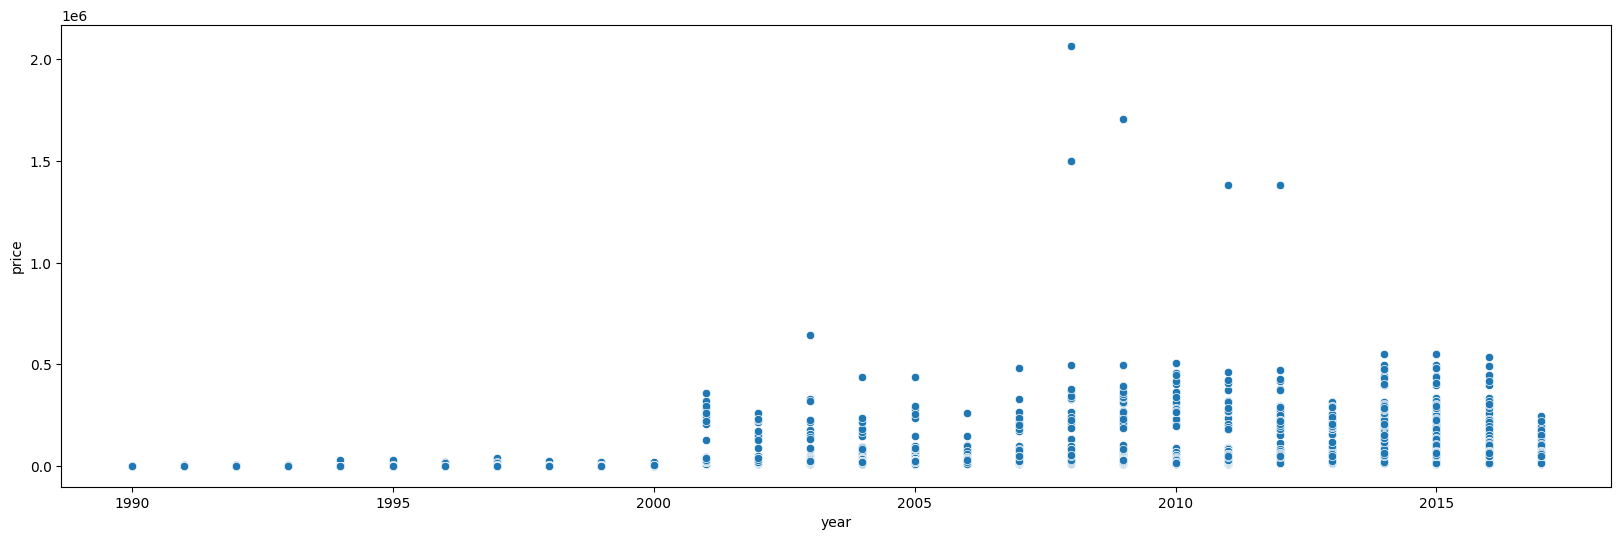

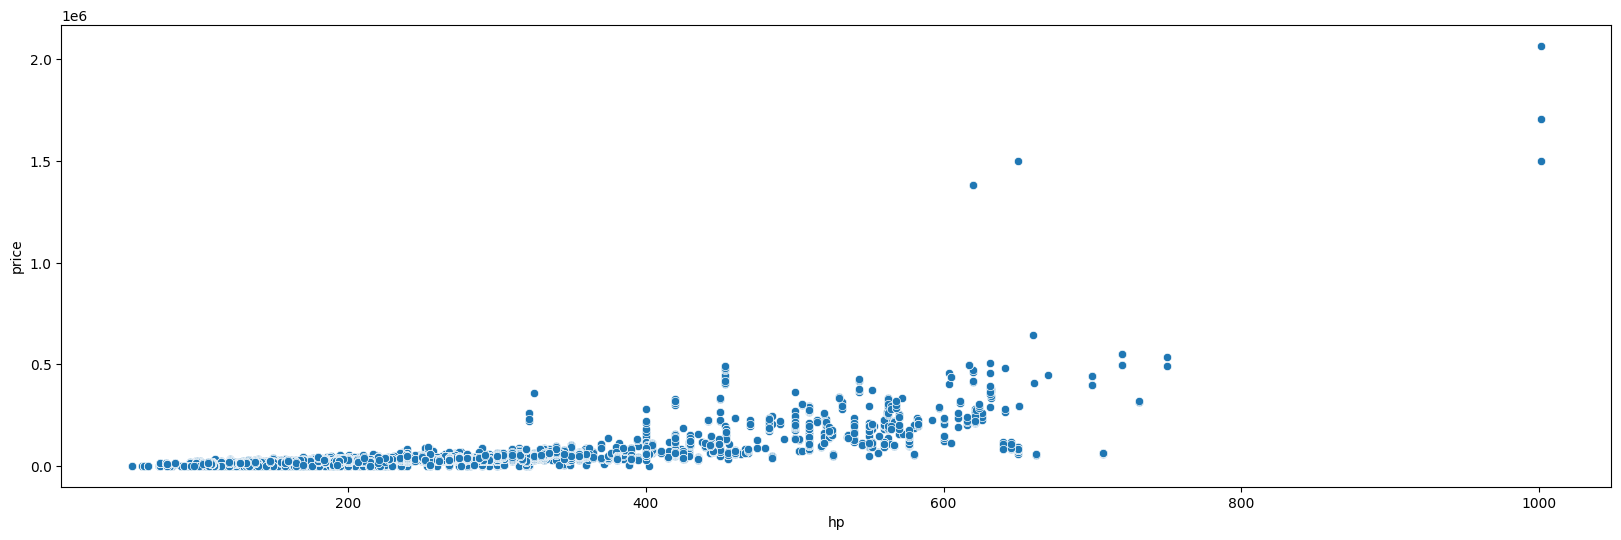

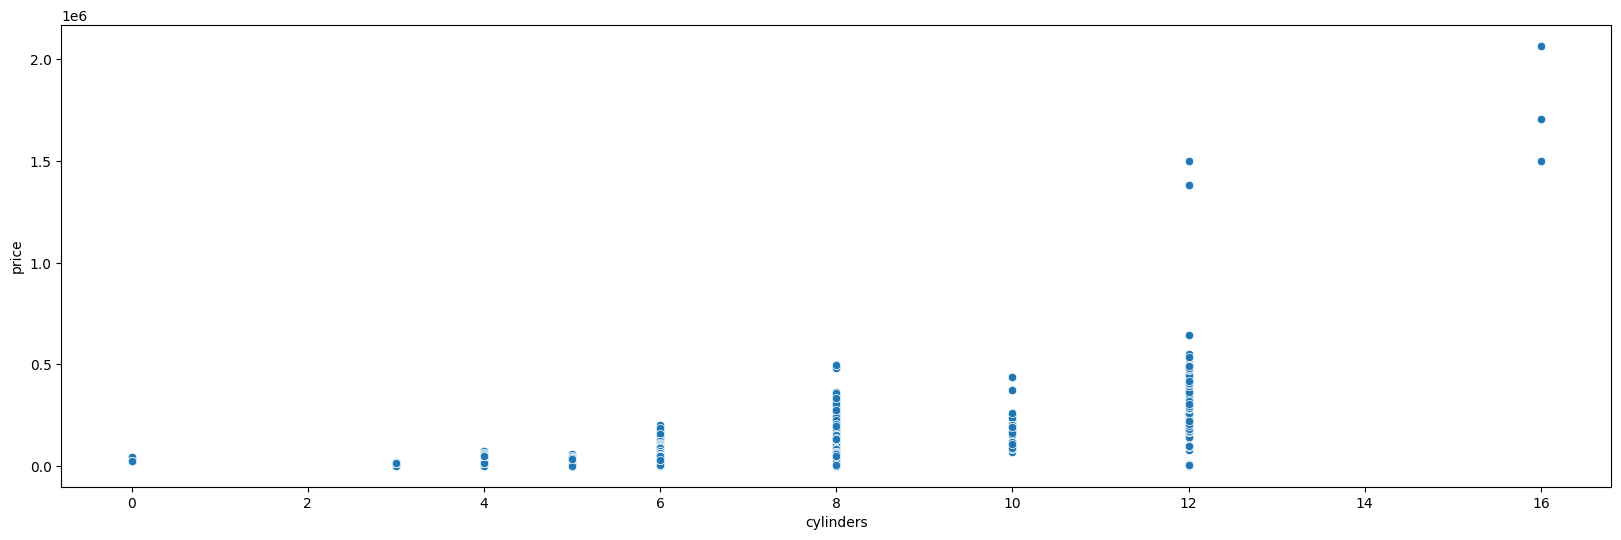

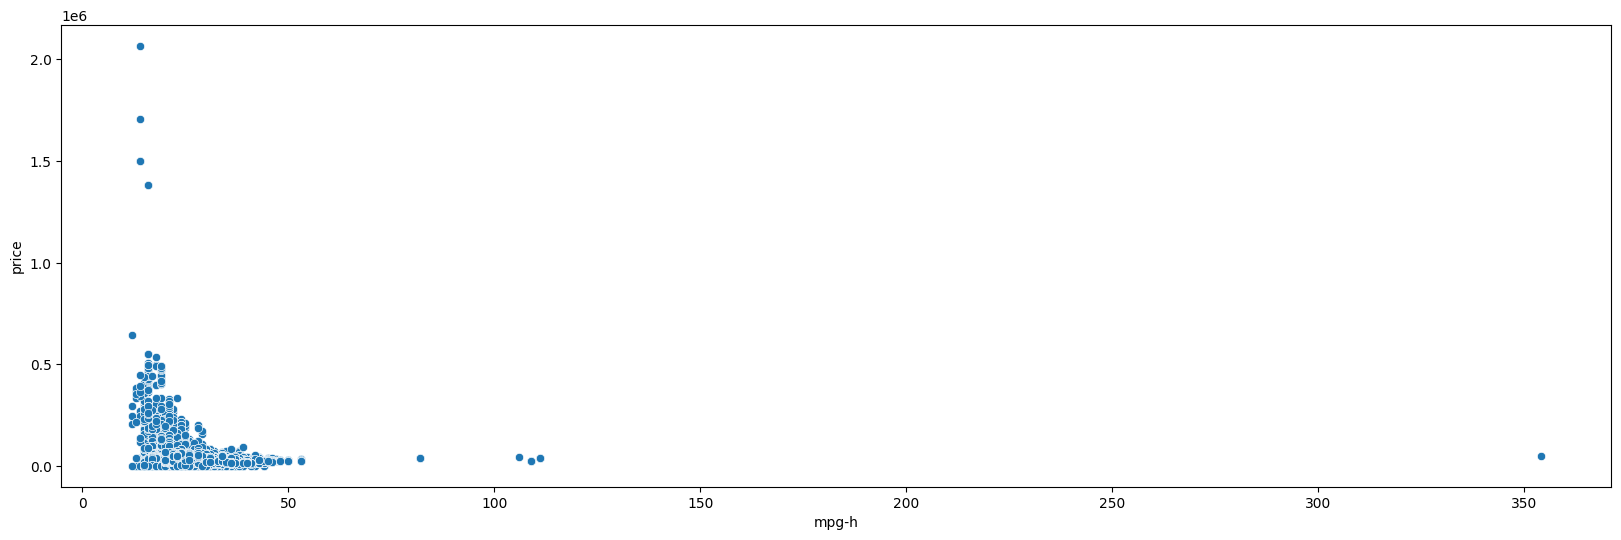

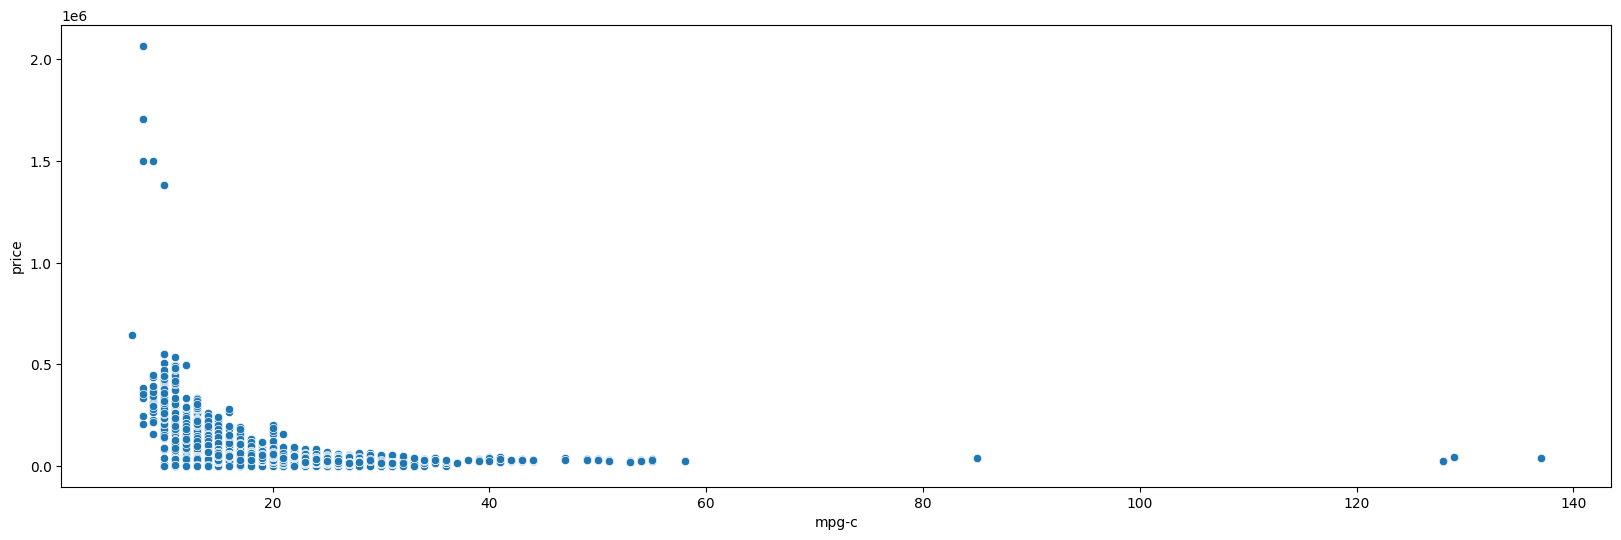

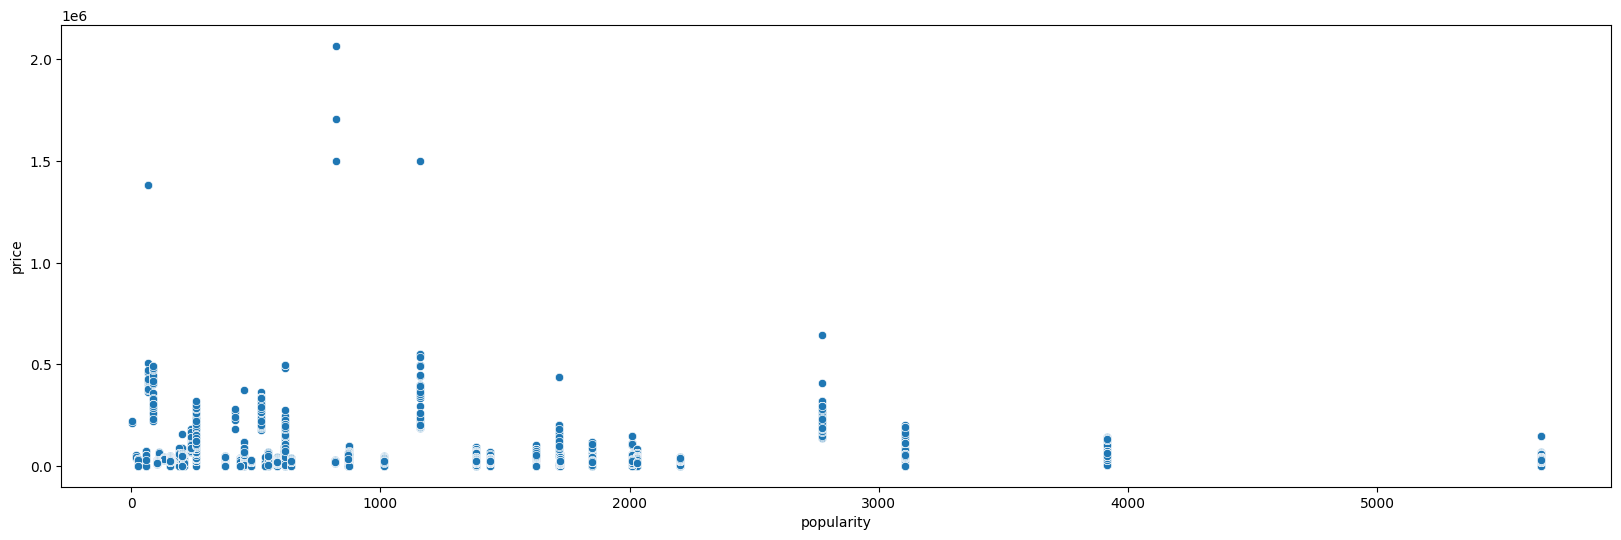

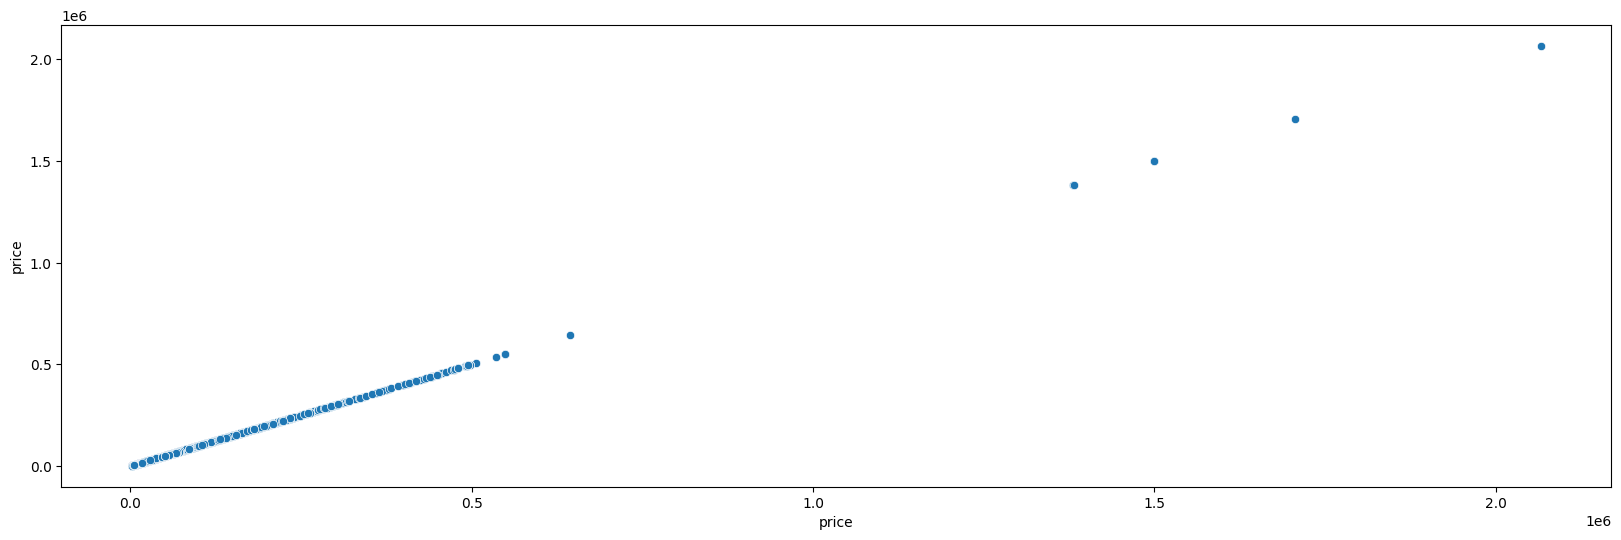

In [ ]:
for col in df_numerical:
    plt.figure(figsize=(20,6))
    sns.scatterplot(x=df[col], y=df['price'])

6. **Predictive analytics**

In [ ]:
df.dtypes

make                 object
model                object
year                  int64
engine_fuel_type     object
hp                  float64
cylinders           float64
transmission         object
drive_mode           object
vehicle_size         object
vehicle_style        object
mpg-h                 int64
mpg-c                 int64
popularity            int64
price                 int64
dtype: object

uses label encoding to convert categorical data to numeric

In [ ]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,make,model,year,engine_fuel_type,hp,cylinders,transmission,drive_mode,vehicle_size,vehicle_style,mpg-h,mpg-c,popularity,price
0,4,1,2011,7,335.0,6.0,3,3,0,8,26,19,3916,46135
1,4,0,2011,7,300.0,6.0,3,3,0,6,28,19,3916,40650
2,4,0,2011,7,300.0,6.0,3,3,0,8,28,20,3916,36350
3,4,0,2011,7,230.0,6.0,3,3,0,8,28,18,3916,29450
4,4,0,2011,7,230.0,6.0,3,3,0,6,28,18,3916,34500


In [ ]:
df.dtypes

make                  int64
model                 int64
year                  int64
engine_fuel_type      int64
hp                  float64
cylinders           float64
transmission          int64
drive_mode            int64
vehicle_size          int64
vehicle_style         int64
mpg-h                 int64
mpg-c                 int64
popularity            int64
price                 int64
dtype: object

Correlation analysis

In [ ]:
df.corr().T

,make,model,year,engine_fuel_type,hp,cylinders,transmission,drive_mode,vehicle_size,vehicle_style,mpg-h,mpg-c,popularity,price
make,1.000000,0.052940,-0.047754,0.148324,-0.228394,-0.247741,0.056569,-0.038648,-0.103090,-0.060384,0.109181,0.158754,-0.291074,-0.111064
model,0.052940,1.000000,0.052387,0.001602,0.004890,0.065897,-0.094011,-0.082078,0.028249,-0.100268,-0.130805,-0.061561,-0.079203,-0.026995
year,-0.047754,0.052387,1.000000,-0.252259,0.337059,-0.026783,-0.337327,-0.176823,0.104351,-0.075051,0.265428,0.219938,0.086582,0.209204
engine_fuel_type,0.148324,0.001602,-0.252259,1.000000,-0.217592,-0.129012,0.131857,0.020464,-0.060359,-0.046967,-0.046364,-0.017423,-0.052879,-0.124624
hp,-0.228394,0.004890,0.337059,-0.217592,1.000000,0.788598,-0.230076,-0.023460,0.204876,0.010183,-0.424009,-0.474992,0.041547,0.659421
cylinders,-0.247741,0.065897,-0.026783,-0.129012,0.788598,1.000000,-0.169688,0.092690,0.194006,0.034335,-0.614830,-0.634503,0.042656,0.552647
transmission,0.056569,-0.094011,-0.337327,0.131857,-0.230076,-0.169688,1.000000,0.174293,-0.309127,-0.031605,0.045047,0.046802,0.013229,-0.176750
drive_mode,-0.038648,-0.082078,-0.176823,0.020464,-0.023460,0.092690,0.174293,1.000000,-0.130245,0.102234,-0.001194,-0.016866,0.024878,-0.029779
vehicle_size,-0.103090,0.028249,0.104351,-0.060359,0.204876,0.194006,-0.309127,-0.130245,1.000000,0.142315,-0.109834,-0.156383,-0.000706,0.033157
vehicle_style,-0.060384,-0.100268,-0.075051,-0.046967,0.010183,0.034335,-0.031605,0.102234,0.142315,1.000000,0.044957,-0.035240,0.042041,-0.013784


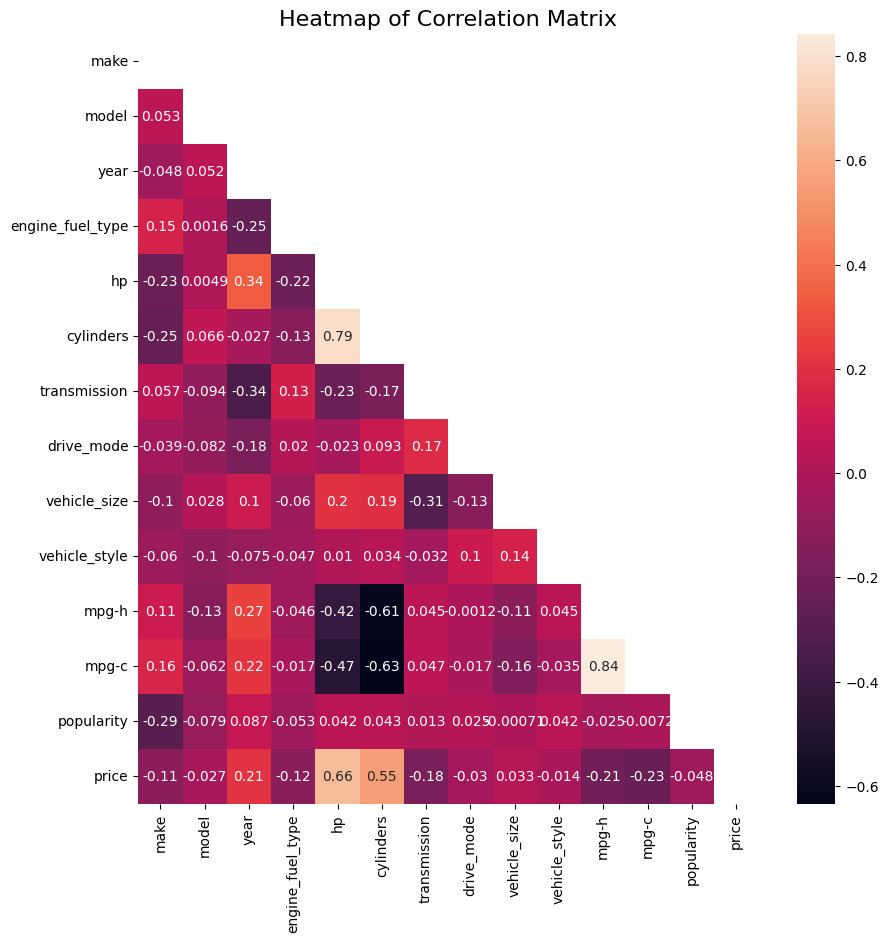

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (10,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, mask=mask, annot=True)
plt.title('Heatmap of Correlation Matrix',fontsize=16)
plt.show()

modeling data using several algorithms



In [ ]:
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error':[] ,'Adj_R_Squared':[] ,'Root_Mean_Squared_Error':[] ,'Mean_Absolute_Percentage_Error':[] ,'Mean_Squared_Error':[] ,'Root_Mean_Squared_Log_Error':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error,Adj_R_Squared,Root_Mean_Squared_Error,Mean_Absolute_Percentage_Error,Mean_Squared_Error,Root_Mean_Squared_Log_Error,R2_score


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7764, 13), (3328, 13), (7764,), (3328,))

Normalization with min max scaler, data scaling/fitting data within a certain range/range (minimum value range to maximum value), with the commonly used range being 0 to 1.


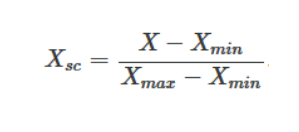

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
modellr = LinearRegression()
modeldtr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelxgr = xgb.XGBRegressor()
modeletr = ExtraTreesRegressor()
modelbgr = BaggingRegressor(n_estimators = 100, max_samples = 20, max_features = 13)

MM = [modellr, modeldtr, modelrfr, modelxgr, modeletr, modelbgr]

for models in MM:

    models.fit(x_train, y_train)

    y_pred = models.predict(x_test.values)

    print('Model Name: ', models)

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Squared: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Squared' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 29407.223
Mean Squared Error (MSE): 2555064765.792
Root Mean Squared Error (RMSE): 50547.648
R2_score: 0.338482
Root Mean Squared Log Error (RMSLE): 10.831
Mean Absolute Percentage Error (MAPE): 199.17 %
Adj R Squared:  0.337706
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 7305.511
Mean Squared Error (MSE): 543352125.426
Root Mean Squared Error (RMSE): 23309.915
R2_score: 0.859324
Root Mean Squared Log Error (RMSLE): 10.057
Mean Absolute Percentage Error (MAPE): 14.43 %
Adj R Squared:  0.859159
------------------------------------------------------------------------------------------------------------


<ipython-input-31-ec9eb13c1f30>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
<ipython-input-31-ec9eb13c1f30>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 5751.173
Mean Squared Error (MSE): 301454124.651
Root Mean Squared Error (RMSE): 17362.434
R2_score: 0.921952
Root Mean Squared Log Error (RMSLE): 9.762
Mean Absolute Percentage Error (MAPE): 15.73 %
Adj R Squared:  0.92186
------------------------------------------------------------------------------------------------------------


<ipython-input-31-ec9eb13c1f30>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error (MAE): 5809.677
Mean Squared Error (MSE): 277885298.42
Root Mean Squared Error (RMSE): 16669.892
R2_score: 0.928054
Root Mean Squared Log Error (RMSLE): 9.721
Mean Absolute Percentage Error (MAPE): 23.98 %
Adj R Squared:  0.92

<ipython-input-31-ec9eb13c1f30>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 5223.589
Mean Squared Error (MSE): 364078682.762
Root Mean Squared Error (RMSE): 19080.846
R2_score: 0.905738
Root Mean Squared Log Error (RMSLE): 9.856
Mean Absolute Percentage Error (MAPE): 10.93 %
Adj R Squared:  0.905627
------------------------------------------------------------------------------------------------------------


<ipython-input-31-ec9eb13c1f30>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor(max_features=13, max_samples=20, n_estimators=100)
Mean Absolute Error (MAE): 13865.824
Mean Squared Error (MSE): 2179978375.142
Root Mean Squared Error (RMSE): 46690.239
R2_score: 0.435594
Root Mean Squared Log Error (RMSLE): 10.751
Mean Absolute Percentage Error (MAPE): 86.62 %
Adj R Squared:  0.434932
------------------------------------------------------------------------------------------------------------


<ipython-input-31-ec9eb13c1f30>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
Results

,Model Name,Mean_Absolute_Error,Adj_R_Squared,Root_Mean_Squared_Error,Mean_Absolute_Percentage_Error,Mean_Squared_Error,Root_Mean_Squared_Log_Error,R2_score,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE
0,LinearRegression(),NaN,0.337706,NaN,NaN,NaN,NaN,0.338482,29407.222842,50547.648469,199.169755,2.555065e+09,10.830672
1,DecisionTreeRegressor(),NaN,0.859159,NaN,NaN,NaN,NaN,0.859324,7305.510835,23309.914745,14.434695,5.433521e+08,10.056634
2,"(DecisionTreeRegressor(max_features=1.0, rando...",NaN,0.921860,NaN,NaN,NaN,NaN,0.921952,5751.173098,17362.434295,15.728477,3.014541e+08,9.762064
3,"XGBRegressor(base_score=None, booster=None, ca...",NaN,0.927970,NaN,NaN,NaN,NaN,0.928054,5809.677000,16669.891974,23.984599,2.778853e+08,9.721359
4,"(ExtraTreeRegressor(random_state=1800791587), ...",NaN,0.905627,NaN,NaN,NaN,NaN,0.905738,5223.589258,19080.845966,10.934869,3.640787e+08,9.856440
5,(DecisionTreeRegressor(random_state=1580024244...,NaN,0.434932,NaN,NaN,NaN,NaN,0.435594,13865.823507,46690.238542,86.619844,2.179978e+09,10.751290


In [ ]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','ExtraTreesRegressor','BaggingRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Squared']=Results['Adj_R_Squared']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Squared',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Squared,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,XGBRegressor,0.927970,5809.677000,16669.891974,23.984599,2.778853e+08,9.721359,0.928054
1,RandomForestRegressor,0.921860,5751.173098,17362.434295,15.728477,3.014541e+08,9.762064,0.921952
2,ExtraTreesRegressor,0.905627,5223.589258,19080.845966,10.934869,3.640787e+08,9.856440,0.905738
3,DecisionTreeRegressor,0.859159,7305.510835,23309.914745,14.434695,5.433521e+08,10.056634,0.859324
4,BaggingRegressor,0.434932,13865.823507,46690.238542,86.619844,2.179978e+09,10.751290,0.435594
5,LinearRegression,0.337706,29407.222842,50547.648469,199.169755,2.555065e+09,10.830672,0.338482


7. **Training Data**

I will train the data with the xgb regression algorithm because it has the highest r score

```
# Ini diformat sebagai kode
```



In [ ]:
modelxgr.fit(x_train, y_train)

y_pred = modelxgr.predict(x_test.values)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [ ]:
result.sample(19)

,make,model,year,engine_fuel_type,hp,cylinders,transmission,drive_mode,vehicle_size,vehicle_style,mpg-h,mpg-c,popularity,price,Price_actual,Price_pred
3851,19,295,2011,8,138.0,4.0,1,2,0,2,30,23,1439,20295,20295,19599.232422
7027,33,558,2015,8,260.0,6.0,1,2,2,3,28,21,2009,39000,39000,35340.878906
4879,21,361,2017,8,147.0,4.0,1,2,0,14,38,29,1720,19200,19200,19844.556641
3153,9,247,2015,8,138.0,4.0,1,2,2,14,38,26,1385,24270,24270,23333.064453
8905,46,693,2016,8,250.0,5.0,1,0,2,14,29,20,870,43400,43400,40879.914062
5361,45,414,2017,8,170.0,4.0,0,0,0,15,30,22,873,30530,30530,28828.333984
4799,14,356,2017,4,160.0,4.0,0,2,0,2,40,27,5657,19765,19765,24544.267578
1504,8,91,2016,8,335.0,6.0,1,3,0,8,30,20,1624,48675,48675,54509.054688
8611,45,681,2010,8,197.0,6.0,1,2,2,11,23,16,873,30600,30600,29243.378906
11029,44,821,2017,8,381.0,8.0,1,3,1,13,18,13,2031,30400,30400,40359.621094


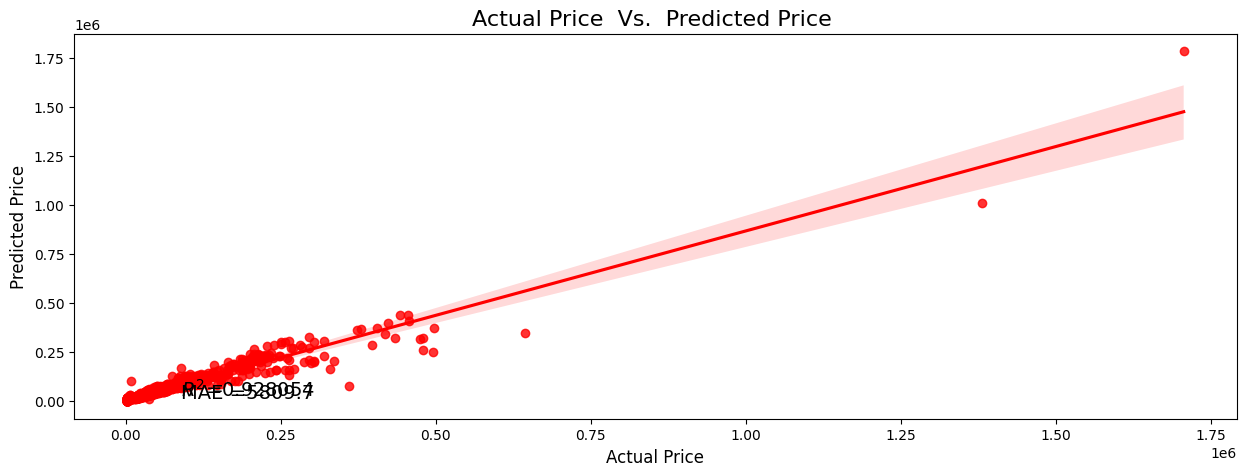

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='red')
plt.title('Actual Price  Vs.  Predicted Price ',fontsize=16)
plt.xlabel('Actual Price',fontsize=12)
plt.ylabel('Predicted Price',fontsize=12)
r_squared = round(metrics.r2_score(y_test, y_pred),6)
Mean_Absolute_Error_MAE =  round(metrics.mean_absolute_error(y_test, y_pred),1)
plt.text(90000,25000,'$ R^{2} $=' + str(r_squared),fontsize=14)
plt.text(90000,15000,'MAE =' + str(Mean_Absolute_Error_MAE),fontsize=14)
plt.show()

In [ ]:
print("Accuracy on Traing set: ",modelxgr.score(x_train,y_train))
print("Accuracy on Testing set: ",modelxgr.score(x_test,y_test))

Accuracy on Traing set:  0.9919934857328916
Accuracy on Testing set:  0.9280542396317534


# CONCLUSION


1. The independent variables that have the most influence on price are hp, cylinders, and year

2. Based on the comparison of the results of the regression model, the XGB Regressor, Random Forest and Decision Tree, have higher R squared scores and adjusted R squared values, because they have lower error values compared to other models.